In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

current_directory = os.getcwd()
print("Current working directory: ", current_directory)

Current working directory:  C:\Users\Akshara Dileep\anaconda3\Main Project


In [3]:
dataset=pd.read_csv("C:\\Users\\Akshara Dileep\\anaconda3\\Main Project\\train.csv")
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
dataset=dataset.drop(columns='employee_id',axis=1)

In [5]:
print(dataset.head())

          department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                

In [6]:
dataset.shape

(54808, 13)

In [7]:
mainData=dataset.copy()

In [8]:
# Percentage of missing values for each column  in Dataset
(dataset.isnull().mean())*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [9]:
dataset.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
import numpy as np

In [11]:
def randomness_missingValue(df,variable):
    dataset[variable+'_null']=np.where(dataset[variable].isnull(),1,0)
    dataset[variable+'_null'].mean() 
    return dataset.groupby(['is_promoted'])[variable+'_null'].mean()

In [12]:
randomness_missingValue(dataset,'previous_year_rating')

is_promoted
0    0.075489
1    0.072622
Name: previous_year_rating_null, dtype: float64

In [13]:
randomness_missingValue(dataset,'education')

is_promoted
0    0.045612
1    0.026135
Name: education_null, dtype: float64

In [14]:
dataset.drop(columns=['previous_year_rating_null','education_null'],axis=1,inplace=True)

In [15]:
dataset.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [16]:
dataset.shape


(54808, 13)

<Axes: xlabel='education'>

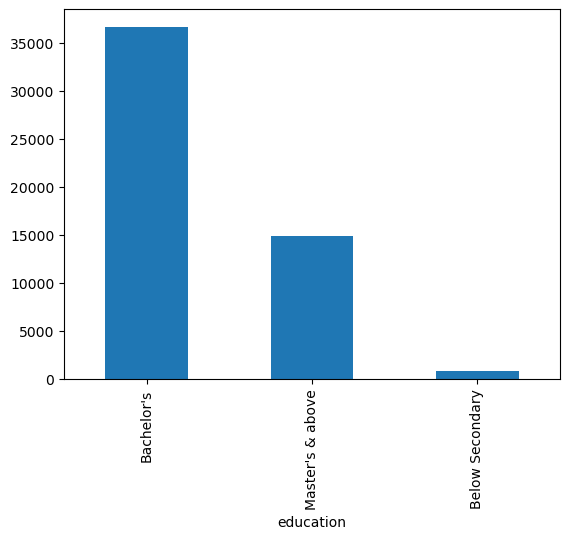

In [17]:
dataset['education'].value_counts().plot(kind='bar')

In [18]:
data=[i for i in dataset.columns if i not in ['department','region','previous_year_rating']]
dataForEdu=dataset[data]

In [19]:
dataForEdu.head()

,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,f,sourcing,1,35,8,1,0,49,0
1,Bachelor's,m,other,1,30,4,0,0,60,0
2,Bachelor's,m,sourcing,1,34,7,0,0,50,0
3,Bachelor's,m,other,2,39,10,0,0,50,0
4,Bachelor's,m,other,1,45,2,0,0,73,0


<Axes: xlabel='education'>

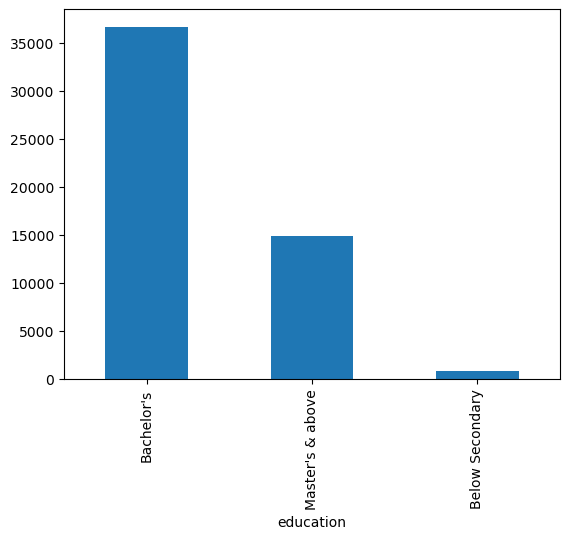

In [20]:
dataForEdu['education'].value_counts().plot(kind='bar')

In [21]:
nanIndex=dataForEdu[dataForEdu['education'].isnull()].index.tolist()

In [22]:
testData=dataForEdu[dataForEdu.index.isin(nanIndex)]
testData

,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,NaN,m,sourcing,1,30,1,0,0,77,0
21,NaN,m,sourcing,1,41,11,0,0,57,0
32,NaN,f,sourcing,1,24,2,0,0,48,0
43,NaN,m,other,3,24,2,0,0,48,0
82,NaN,m,sourcing,2,25,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...
54692,NaN,f,sourcing,1,35,7,0,0,53,0
54717,NaN,m,sourcing,1,32,4,0,0,86,0
54729,NaN,f,other,1,28,2,0,0,53,0
54742,NaN,m,other,1,28,3,0,0,47,0


In [23]:
totalIndex=dataForEdu.index.tolist()

In [24]:
notNullIndex=[i for i in totalIndex if i not in nanIndex ]

In [25]:
trainData=dataForEdu[dataForEdu.index.isin(notNullIndex)]
trainData

,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,f,sourcing,1,35,8,1,0,49,0
1,Bachelor's,m,other,1,30,4,0,0,60,0
2,Bachelor's,m,sourcing,1,34,7,0,0,50,0
3,Bachelor's,m,other,2,39,10,0,0,50,0
4,Bachelor's,m,other,1,45,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...
54802,Bachelor's,m,other,2,31,2,0,0,49,0
54803,Bachelor's,m,sourcing,1,48,17,0,0,78,0
54804,Master's & above,f,other,1,37,6,0,0,56,0
54805,Bachelor's,m,other,1,27,3,1,0,79,0


In [26]:
X_train=trainData.iloc[:,1:]
X_train.head()

,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,f,sourcing,1,35,8,1,0,49,0
1,m,other,1,30,4,0,0,60,0
2,m,sourcing,1,34,7,0,0,50,0
3,m,other,2,39,10,0,0,50,0
4,m,other,1,45,2,0,0,73,0


In [27]:
y_train=trainData.iloc[:,0]
y_train.head()

0    Master's & above
1          Bachelor's
2          Bachelor's
3          Bachelor's
4          Bachelor's
Name: education, dtype: object

In [28]:
y_train.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [29]:
y_train=y_train.replace({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

In [30]:
X_train=pd.get_dummies(X_train)

In [31]:
# K-Nearest Neighbor(KNN) for predicting NAN values for Education column
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
print(clf)
# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)


In [32]:
testData=testData.iloc[:,1:]
testData

,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,m,sourcing,1,30,1,0,0,77,0
21,m,sourcing,1,41,11,0,0,57,0
32,f,sourcing,1,24,2,0,0,48,0
43,m,other,3,24,2,0,0,48,0
82,m,sourcing,2,25,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...
54692,f,sourcing,1,35,7,0,0,53,0
54717,m,sourcing,1,32,4,0,0,86,0
54729,f,other,1,28,2,0,0,53,0
54742,m,other,1,28,3,0,0,47,0


In [33]:
testData1=pd.get_dummies(testData)

In [34]:
testDataPred=KNN.predict(testData1).tolist()

In [35]:
df = pd.DataFrame(testDataPred, columns = ["education"])
df

,education
0,2
1,2
2,2
3,2
4,2
...,...
2404,3
2405,2
2406,2
2407,2


In [36]:
#Converting encoded Value to original Data
df['education']=df['education'].replace({3:"Master's & above",2:"Bachelor's",1:'Below Secondary'})
df

,education
0,Bachelor's
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Bachelor's
...,...
2404,Master's & above
2405,Bachelor's
2406,Bachelor's
2407,Bachelor's


In [37]:
print(df.shape)
print(testData.shape)

(2409, 1)
(2409, 9)


In [38]:
mainData #copy of the dataset

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [39]:
nanDataForFilter=mainData[mainData.index.isin(nanIndex)]
nanDataForFilter

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


In [40]:
nanDataForFilter=nanDataForFilter.drop(columns='education',axis=1)

In [41]:
nanDataForFilter

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,m,sourcing,1,30,NaN,1,0,0,77,0
21,Operations,region_15,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54692,Sales & Marketing,region_2,f,sourcing,1,35,3.0,7,0,0,53,0
54717,Analytics,region_2,m,sourcing,1,32,3.0,4,0,0,86,0
54729,HR,region_2,f,other,1,28,3.0,2,0,0,53,0
54742,Sales & Marketing,region_31,m,other,1,28,4.0,3,0,0,47,0


In [42]:
nanDataForFilter=nanDataForFilter.reset_index()

In [43]:
df

,education
0,Bachelor's
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Bachelor's
...,...
2404,Master's & above
2405,Bachelor's
2406,Bachelor's
2407,Bachelor's


In [44]:
NanValueData=pd.concat([df, nanDataForFilter], axis=1)
NanValueData=NanValueData.drop(columns='index',axis=1)

In [45]:
NotNullData=mainData[mainData.index.isin(notNullIndex)]

In [46]:
print(NanValueData.shape)
print(NotNullData.shape)

(2409, 13)
(52399, 13)


In [47]:
NanValueData.head()

,education,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Bachelor's,Technology,region_23,m,sourcing,1,30,NaN,1,0,0,77,0
1,Bachelor's,Operations,region_15,m,sourcing,1,41,4.0,11,0,0,57,0
2,Bachelor's,Sales & Marketing,region_7,f,sourcing,1,24,1.0,2,0,0,48,0
3,Bachelor's,Sales & Marketing,region_2,m,other,3,24,2.0,2,0,0,48,0
4,Bachelor's,Sales & Marketing,region_2,m,sourcing,2,25,3.0,2,0,0,53,0


In [48]:
NanValueData=NanValueData[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']]

In [49]:
NanValueData.head()
NanValueData.shape

(2409, 13)

In [50]:
NotNullData.head()
NotNullData.shape

(52399, 13)

In [51]:
DataSet=pd.concat([NotNullData,NanValueData],ignore_index=True)
DataSet.shape

(54808, 13)

In [52]:
print(type(NotNullData))
print(type(NanValueData))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [53]:
DataSet.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<Axes: xlabel='previous_year_rating'>

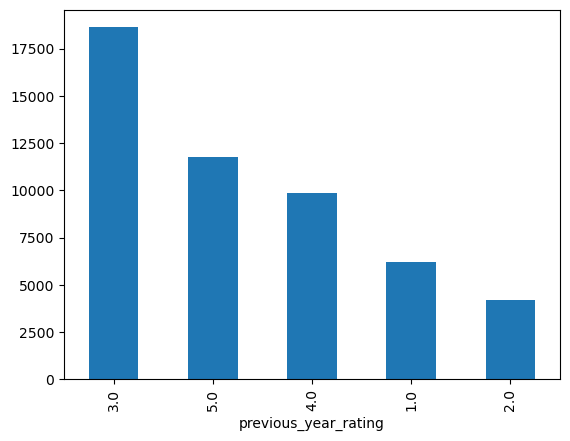

In [54]:
#Missing Value treatment for previous_year_rating
DataSet['previous_year_rating'].value_counts().plot(kind='bar')

In [55]:
#As per looking into distribution for frequency in previous_year_rating var 3.0 , 5.0, 4.0 is frequently given to employees.Choosing one of these using mode could create biasness.
# So Adding A separate col for weightage given to NAN values would be help full

DataSet['previous_year_rating_Var']=np.where(DataSet['previous_year_rating'].isnull(),1,0)

In [56]:
#But in education variable looking into we can impute with the mode value as Bachelor's is quite dominant in frequency count
def impute_mode(df,variable):
    frequent=DataSet[variable].mode()[0]
    DataSet[variable].fillna(frequent,inplace=True)

In [57]:
DataSet.isnull().sum()

department                     0
region                         0
education                      0
gender                         0
recruitment_channel            0
no_of_trainings                0
age                            0
previous_year_rating        4124
length_of_service              0
KPIs_met >80%                  0
awards_won?                    0
avg_training_score             0
is_promoted                    0
previous_year_rating_Var       0
dtype: int64

In [58]:
variable=['previous_year_rating']
for var in variable:
    impute_mode(DataSet,var)

In [59]:
DataSet.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted                 0
previous_year_rating_Var    0
dtype: int64

In [60]:
DataSet['region'].nunique()

34

# Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

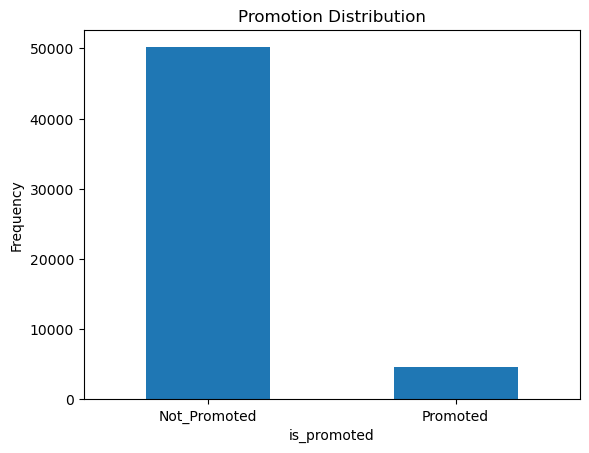

In [61]:
#Distribution of Target VAriable
from matplotlib import pyplot as plt
count_classes = pd.value_counts(DataSet['is_promoted'], sort = True)
LABELS=['Not_Promoted','Promoted',]

count_classes.plot(kind = 'bar', rot=0)

plt.title("Promotion Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("is_promoted")

plt.ylabel("Frequency")

In [62]:
promoted=dataset[DataSet['is_promoted']==1]
NotPromoted=dataset[DataSet['is_promoted']==0]

In [63]:
print(promoted.shape)
print(NotPromoted.shape)

(4668, 13)
(50140, 13)


In [64]:
df=DataSet.copy()
df.shape

(54808, 14)

In [65]:
#Create independent and Dependent Features
columns = DataSet.columns.tolist()
columns = [c for c in columns if c not in ["is_promoted"]]
target = "is_promoted"
# Define a random state 
state = np.random.RandomState(42)
X = DataSet[columns]
y = DataSet[target]
print(X.shape)
print(y.shape)

(54808, 13)
(54808,)


In [66]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [68]:
import imblearn
print(imblearn.__version__)

0.13.0


In [69]:
from imblearn.over_sampling import RandomOverSampler
X = df.drop('is_promoted', axis=1) 
y = df['is_promoted']
overSampler = RandomOverSampler()
X_bal, y_bal = overSampler.fit_resample(X, y)

In [70]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_bal)))

Original dataset shape Counter({0: 50140, 1: 4668})
Resampled dataset shape Counter({0: 50140, 1: 50140})


In [71]:
print(X.shape)
print(y.shape)
print(X_bal.shape)
print(y_bal.shape)

(54808, 13)
(54808,)
(100280, 13)
(100280,)


In [72]:
X_bal.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [73]:
y_bal=y_bal.to_frame()

In [74]:
data=X_bal.join(y_bal)

In [75]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [76]:
data.shape

(100280, 14)

# variable visualization And Outlier Treatment

In [77]:
data.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
previous_year_rating_Var    0
is_promoted                 0
dtype: int64

In [78]:
data.nunique()

department                   9
region                      34
education                    3
gender                       2
recruitment_channel          3
no_of_trainings             10
age                         41
previous_year_rating         5
length_of_service           35
KPIs_met >80%                2
awards_won?                  2
avg_training_score          61
previous_year_rating_Var     2
is_promoted                  2
dtype: int64

In [79]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'previous_year_rating_Var', 'is_promoted'],
      dtype='object')

<Axes: xlabel='length_of_service'>

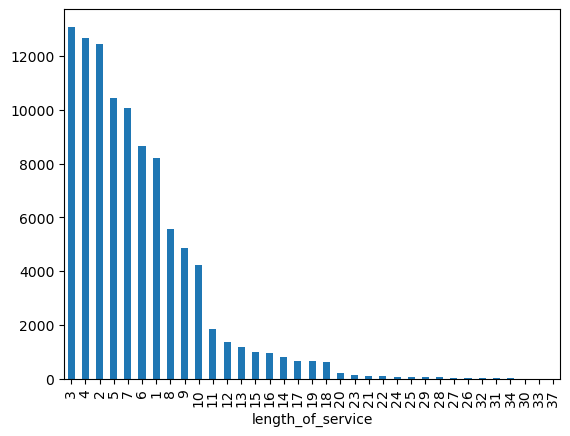

In [80]:
data['length_of_service'].value_counts().plot(kind='bar')

In [81]:
conCol=['age','avg_training_score']
catCol=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?',
       'previous_year_rating_Var']

In [82]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

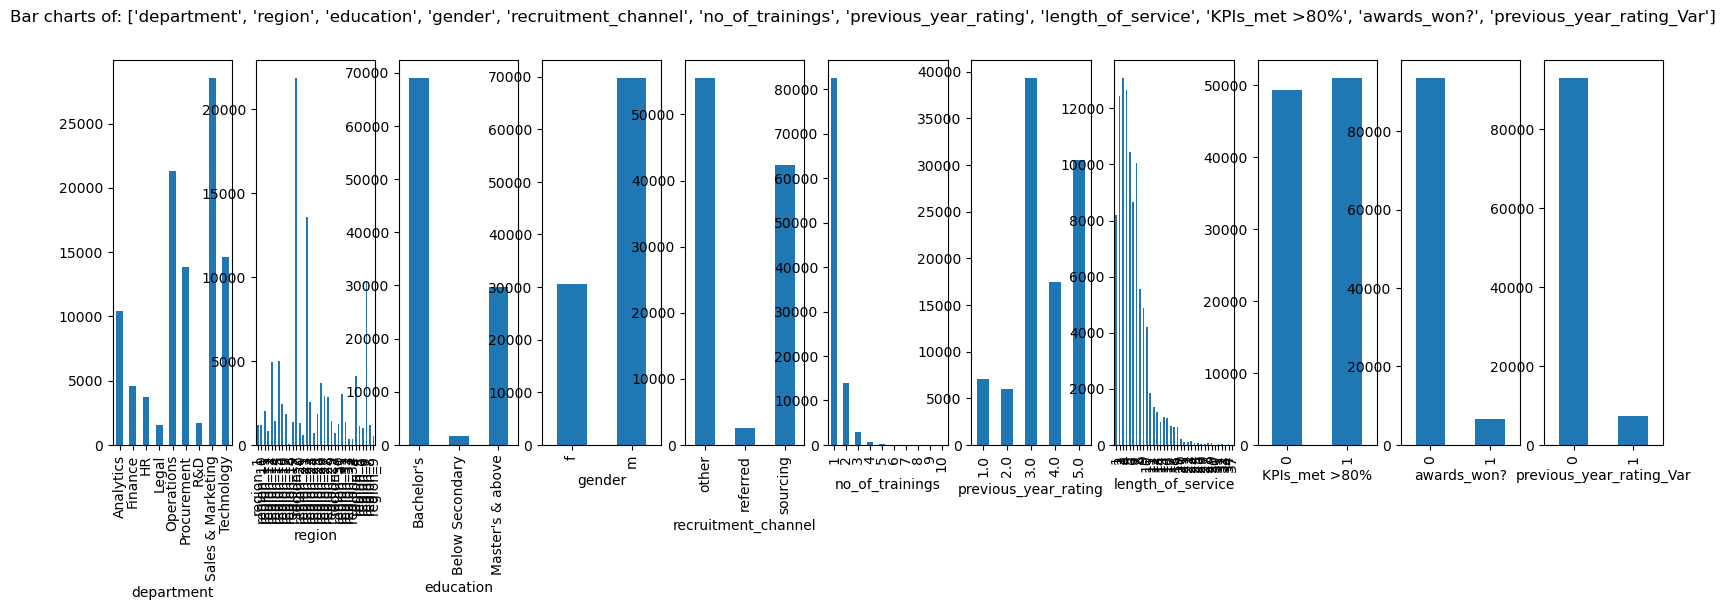

In [83]:
PlotBarCharts(data, catCol)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_training_score'}>]], dtype=object)

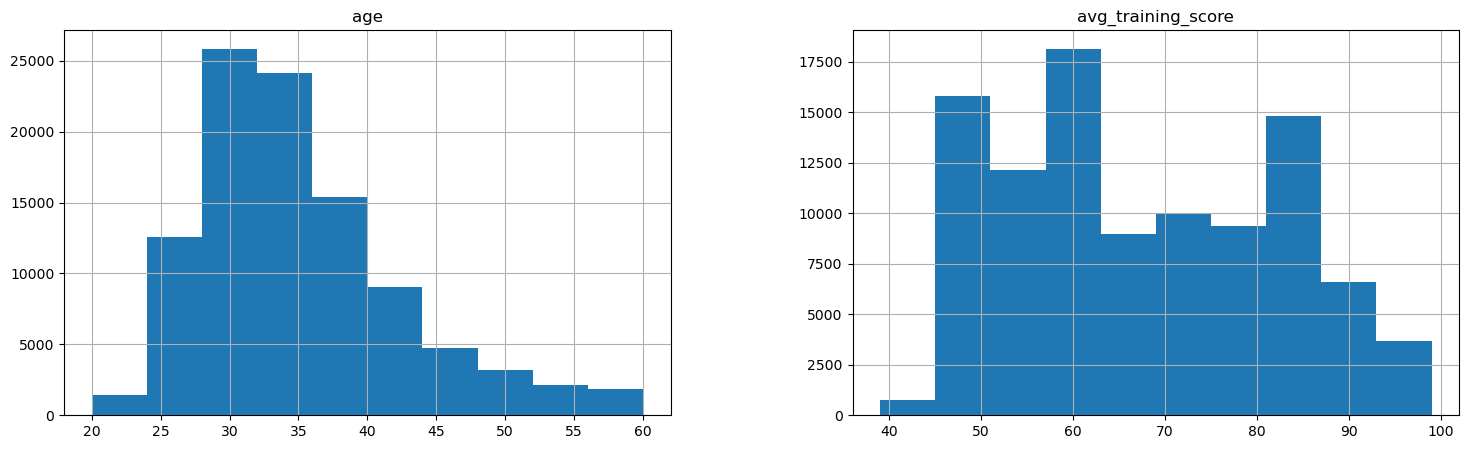

In [84]:
# Plotting histograms of multiple columns together
data.hist(['age','avg_training_score'], figsize=(18,5))

# Visualizing outliers for Contineous cols

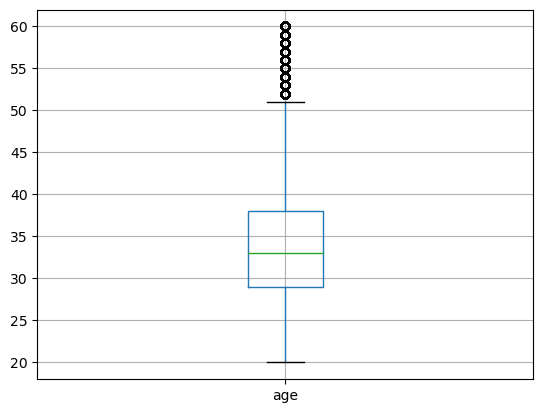

In [85]:
figure=data.boxplot(column="age")

C:\Users\Akshara Dileep\AppData\Local\Temp\ipykernel_8820\2696570761.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

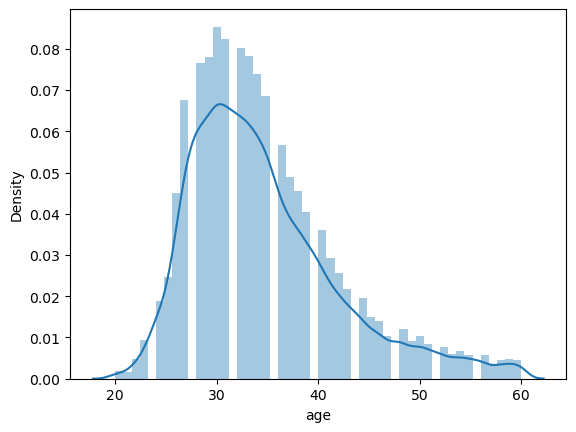

In [86]:
import seaborn as sns
sns.distplot(data['age'])

In [87]:
uppper_boundary=data['age'].mean() + 3* data['age'].std()
lower_boundary=data['age'].mean() - 3* data['age'].std()
print(lower_boundary), print(uppper_boundary),print(df['age'].mean())

12.436334011037346
56.758320955057584
34.80391548679025


(None, None, None)

In [88]:
data.loc[data['age']>=56,'age']=56

C:\Users\Akshara Dileep\AppData\Local\Temp\ipykernel_8820\3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

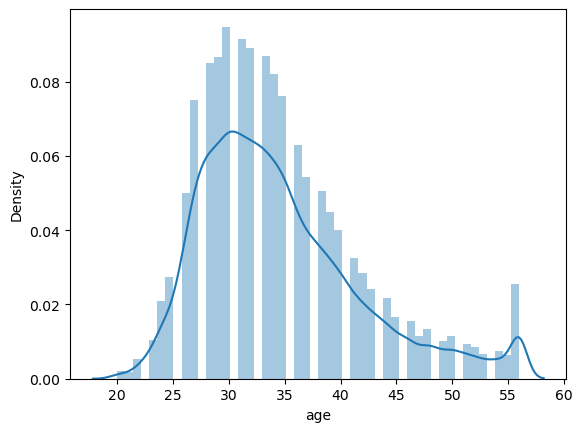

In [89]:
sns.distplot(data['age'])

C:\Users\Akshara Dileep\AppData\Local\Temp\ipykernel_8820\1005979955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['avg_training_score'])


<Axes: xlabel='avg_training_score', ylabel='Density'>

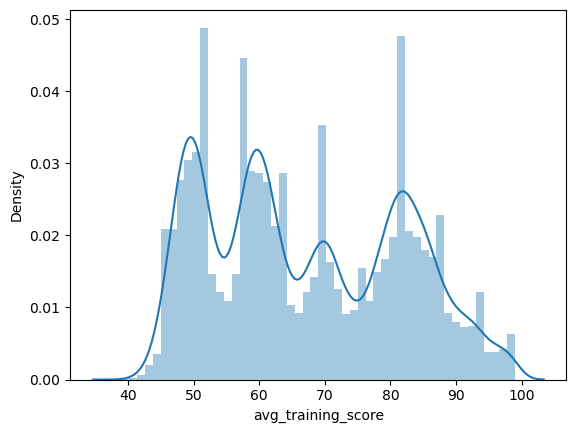

In [90]:
sns.distplot(data['avg_training_score'])

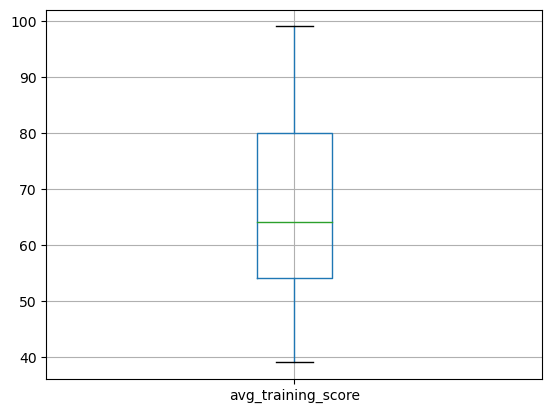

In [91]:
figure=data.boxplot(column="avg_training_score")

In [92]:
data['no_of_trainings'].value_counts()

no_of_trainings
1     82514
2     13853
3      2941
4       726
5       159
6        60
7        12
8         5
10        5
9         5
Name: count, dtype: int64

# Visualizing relationship of variables with Dependent variable AND Feature selection

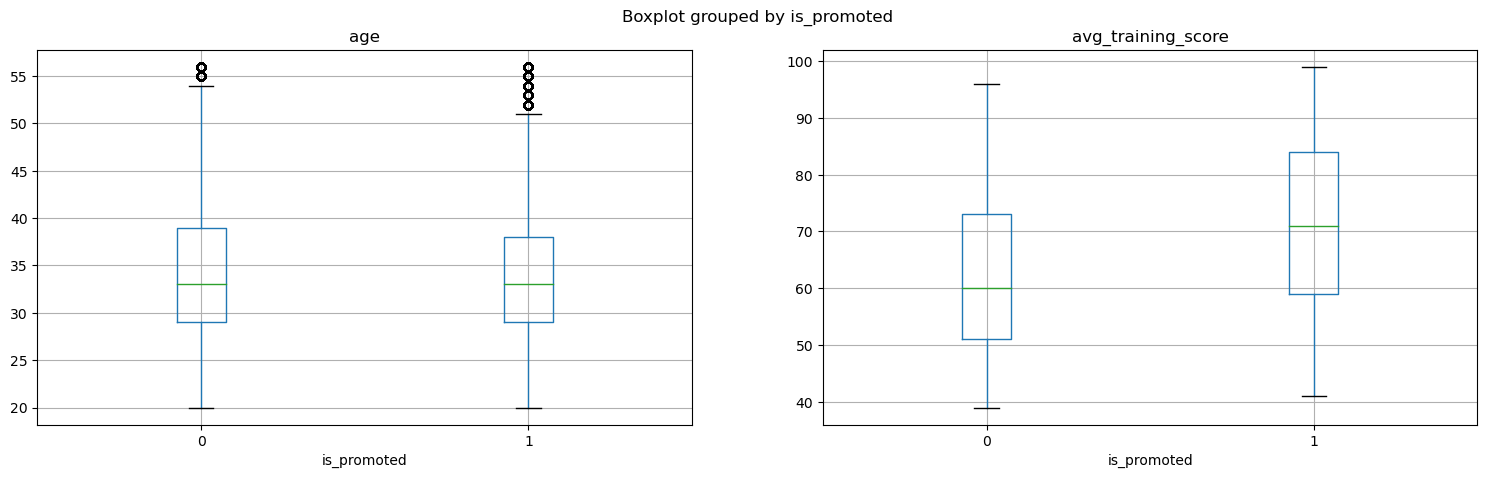

In [93]:
# Box plots for Categorical Target Variable "is_promoted" and continuous predictors
conCol=['age','avg_training_score']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(conCol), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(conCol, range(len(conCol))):
    data.boxplot(column=PredictorCol, by='is_promoted', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Anova Test

In [94]:
#As per the box plot we see there some variance of avg_tarining_score wrt promotion
# For Confirmation let us do Anova Test
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [95]:
# Calling the function to check which categorical variables are correlated with target
conCol=['age','avg_training_score']
FunctionAnova(inpData=data, TargetVariable='is_promoted', ContinuousPredictorList=conCol)

##### ANOVA Results ##### 

age is correlated with is_promoted | P-Value: 5.870346973004631e-26
avg_training_score is correlated with is_promoted | P-Value: 0.0


['age', 'avg_training_score']

# Relationship between category cols with Promotion and Strength measurent with chi-sqr Test

In [96]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=data['gender'], columns=data['is_promoted'])
CrossTabResult

is_promoted,0,1
gender,,
f,14845,15722
m,35295,34418


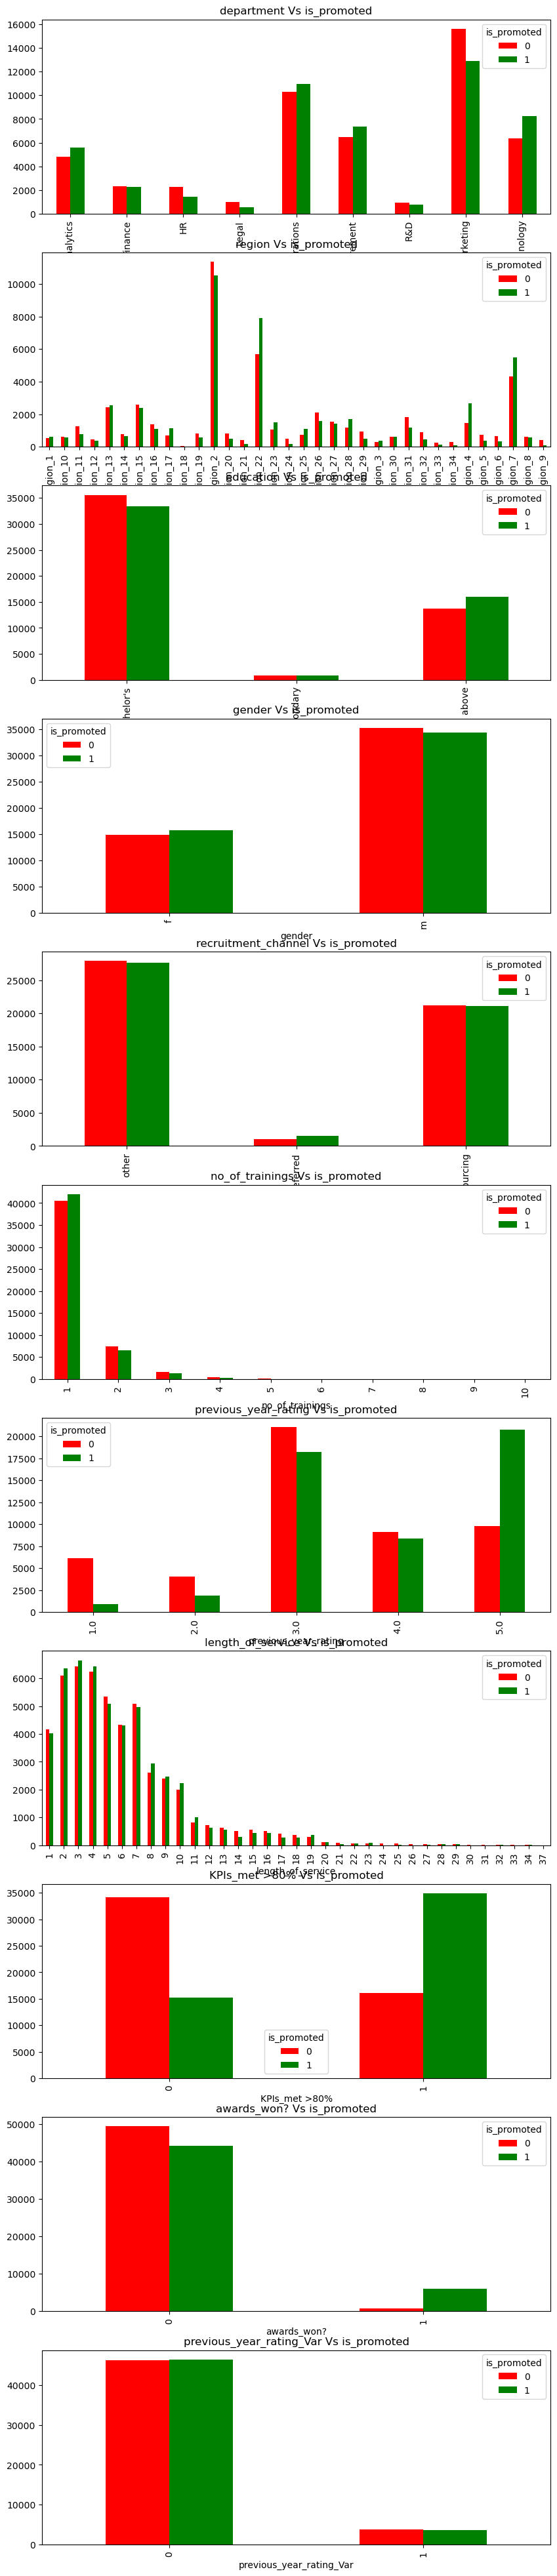

In [97]:
# Visual Inference using Grouped Bar charts
catCol=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?',
       'previous_year_rating_Var']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(catCol), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(catCol, range(len(catCol))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['is_promoted'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'is_promoted')

In [98]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [99]:
catCol=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?',
       'previous_year_rating_Var']

# Calling the function
FunctionChisq(inpData=data, 
              TargetVariable='is_promoted',
              CategoricalVariablesList= catCol)

department is correlated with is_promoted | P-Value: 4.1353075007607754e-203
region is correlated with is_promoted | P-Value: 0.0
education is correlated with is_promoted | P-Value: 4.094762062310209e-51
gender is correlated with is_promoted | P-Value: 1.8626106103572439e-09
recruitment_channel is correlated with is_promoted | P-Value: 1.4104446488362382e-20
no_of_trainings is correlated with is_promoted | P-Value: 1.2831163367110414e-50
previous_year_rating is correlated with is_promoted | P-Value: 0.0
length_of_service is correlated with is_promoted | P-Value: 5.1511516581091115e-68
KPIs_met >80% is correlated with is_promoted | P-Value: 0.0
awards_won? is correlated with is_promoted | P-Value: 0.0
previous_year_rating_Var is NOT correlated with is_promoted | P-Value: 0.06310793481758908


['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?']

# Encoding Categorical Features

In [100]:
 data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [101]:
data['department'].value_counts()

department
Sales & Marketing    28530
Operations           21296
Technology           14633
Procurement          13830
Analytics            10441
Finance               4578
HR                    3727
R&D                   1701
Legal                 1544
Name: count, dtype: int64

In [102]:
#PErcetage promotion in each department
data.groupby(['department'])['is_promoted'].mean()

department
Analytics            0.536443
Finance              0.491044
HR                   0.387711
Legal                0.361399
Operations           0.515167
Procurement          0.533623
R&D                  0.453263
Sales & Marketing    0.452261
Technology           0.564683
Name: is_promoted, dtype: float64

In [103]:
ordinal_labels=data.groupby(['department'])['is_promoted'].mean().sort_values().index
ordinal_labels

Index(['Legal', 'HR', 'Sales & Marketing', 'R&D', 'Finance', 'Operations',
       'Procurement', 'Analytics', 'Technology'],
      dtype='object', name='department')

In [104]:
enumerate(ordinal_labels,0)

In [105]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'Legal': 0,
 'HR': 1,
 'Sales & Marketing': 2,
 'R&D': 3,
 'Finance': 4,
 'Operations': 5,
 'Procurement': 6,
 'Analytics': 7,
 'Technology': 8}

In [106]:
data['department']=data['department'].map(ordinal_labels2)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,2,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,5,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,2,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,8,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [107]:
data['region'].value_counts().to_dict()

{'region_2': 21864,
 'region_22': 13579,
 'region_7': 9799,
 'region_15': 4979,
 'region_13': 4956,
 'region_4': 4126,
 'region_26': 3686,
 'region_31': 3011,
 'region_27': 2937,
 'region_28': 2861,
 'region_23': 2543,
 'region_16': 2461,
 'region_11': 2030,
 'region_17': 1837,
 'region_25': 1830,
 'region_29': 1434,
 'region_14': 1404,
 'region_19': 1388,
 'region_32': 1350,
 'region_20': 1314,
 'region_30': 1219,
 'region_8': 1183,
 'region_10': 1175,
 'region_1': 1164,
 'region_5': 1101,
 'region_6': 988,
 'region_12': 834,
 'region_3': 688,
 'region_24': 679,
 'region_21': 567,
 'region_9': 509,
 'region_33': 374,
 'region_34': 367,
 'region_18': 43}

In [108]:
#Count Or Frequency Encoding
region_map=data['region'].value_counts().to_dict()

In [109]:
data['region']=data['region'].map(region_map)
data.head(20)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,2,9799,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,5,13579,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,2,1388,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2,2543,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,8,3686,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0
5,7,21864,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0,0
6,5,1314,Bachelor's,f,other,1,31,3.0,5,0,0,59,0,0
7,5,367,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0,0
8,7,1314,Bachelor's,m,other,1,28,4.0,5,0,0,83,0,0
9,2,1164,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0,0


In [110]:
data['education']=data['education'].replace({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

In [111]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,2,9799,3,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,5,13579,2,m,other,1,30,5.0,4,0,0,60,0,0
2,2,1388,2,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2,2543,2,m,other,2,39,1.0,10,0,0,50,0,0
4,8,3686,2,m,other,1,45,3.0,2,0,0,73,0,0


In [112]:
#Avoidng Dumy Trap for applying Drop First
data=pd.get_dummies(data,drop_first=True)

In [113]:
data.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,2,9799,3,1,35,5.0,8,1,0,49,0,0,False,False,True
1,5,13579,2,1,30,5.0,4,0,0,60,0,0,True,False,False
2,2,1388,2,1,34,3.0,7,0,0,50,0,0,True,False,True
3,2,2543,2,2,39,1.0,10,0,0,50,0,0,True,False,False
4,8,3686,2,1,45,3.0,2,0,0,73,0,0,True,False,False


In [114]:
data.columns

Index(['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'previous_year_rating_Var',
       'is_promoted', 'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [115]:
data=data[['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'previous_year_rating_Var',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing','is_promoted']]

In [116]:
data.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,2,9799,3,1,35,5.0,8,1,0,49,0,False,False,True,0
1,5,13579,2,1,30,5.0,4,0,0,60,0,True,False,False,0
2,2,1388,2,1,34,3.0,7,0,0,50,0,True,False,True,0
3,2,2543,2,2,39,1.0,10,0,0,50,0,True,False,False,0
4,8,3686,2,1,45,3.0,2,0,0,73,0,True,False,False,0


In [117]:
data.shape

(100280, 15)

# Model Creation

# Machine Learning: Splitting the data into Training and Testing sample

In [118]:
data.columns

Index(['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'previous_year_rating_Var',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'is_promoted'],
      dtype='object')

In [119]:
TargetVariable='is_promoted'
Predictors=[i for i in data.columns if i not in TargetVariable]
print(Predictors)
X=data[Predictors].values
y=data[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

['department', 'region', 'education', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'previous_year_rating_Var', 'gender_m', 'recruitment_channel_referred', 'recruitment_channel_sourcing']


In [120]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70196, 14) (30084, 14) (70196,) (30084,)


# Standardization/Normalization of data

In [121]:
#Sandardization of data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70196, 14) (30084, 14) (70196,) (30084,)


# Naive Bayes


In [123]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clfNaive = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clfNaive)

NB=clfNaive.fit(X_train,y_train)
prediction_NB=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_NB))
print(metrics.confusion_matrix(y_test, prediction_NB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_NB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.62      0.85      0.71     15127
           1       0.75      0.47      0.58     14957

    accuracy                           0.66     30084
   macro avg       0.68      0.66      0.64     30084
weighted avg       0.68      0.66      0.65     30084

[[12807  2320]
 [ 7971  6986]]
Accuracy of the model on Testing Sample Data: 0.65

Accuracy values for 10-fold Cross Validation:
 [0.6442986  0.64100612 0.64139172 0.64188564 0.64594155 0.64262178
 0.64943828 0.64366844 0.65009801 0.65352419]

Final Average Accuracy of the model: 0.65


# Logistic Regression

In [124]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Choose parameter Penalty='l1' or C=1
# Choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG = clf.fit(X_train, y_train)
prediction_log = LOG.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction_log))
print(metrics.confusion_matrix(y_test, prediction_log))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction_log, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Uncomment the line below to print model parameters
# print(LOG)

# Importing cross-validation function from sklearn
# Running 10-Fold Cross-validation on the original classifier
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     15127
           1       0.72      0.75      0.74     14957

    accuracy                           0.73     30084
   macro avg       0.73      0.73      0.73     30084
weighted avg       0.73      0.73      0.73     30084

[[10829  4298]
 [ 3712 11245]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.73406061 0.72556648 0.73428495 0.7363631  0.72328682 0.72965128
 0.7322507  0.73747772 0.73704162 0.75229039]

Final Average Accuracy of the model: 0.73


# Random Forest

RandomForestClassifier(criterion='entropy', max_depth=10)
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     15127
           1       0.74      0.92      0.82     14957

    accuracy                           0.80     30084
   macro avg       0.82      0.80      0.80     30084
weighted avg       0.82      0.80      0.80     30084

[[10395  4732]
 [ 1196 13761]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.80584295 0.79105319 0.79815952 0.80351718 0.7949899  0.7965633
 0.79707679 0.80004975 0.80461572 0.82691375]

Final Average Accuracy of the model: 0.8


<Axes: >

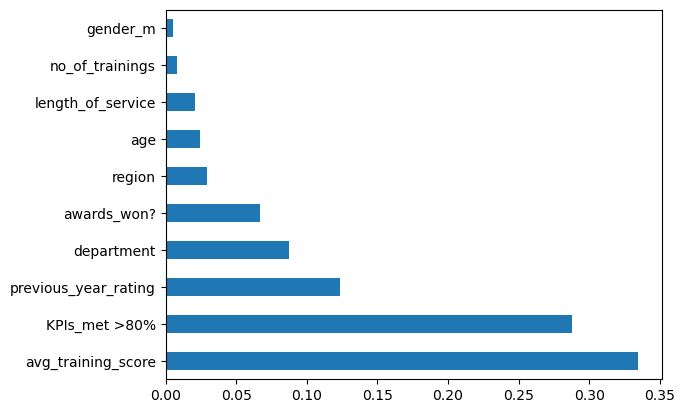

In [125]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
random = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='entropy')


# Printing all the parameters of Random Forest
print(random)

# Creating the model on Training Data
RF=random.fit(X_train,y_train)
prediction_RF=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_RF))
print(metrics.confusion_matrix(y_test, prediction_RF))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_RF, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Plot ROC and compare AUC

In [126]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test,prediction_RF)

(array([0.        , 0.31281814, 1.        ]),
 array([0.        , 0.92003744, 1.        ]),
 array([inf,  1.,  0.]))

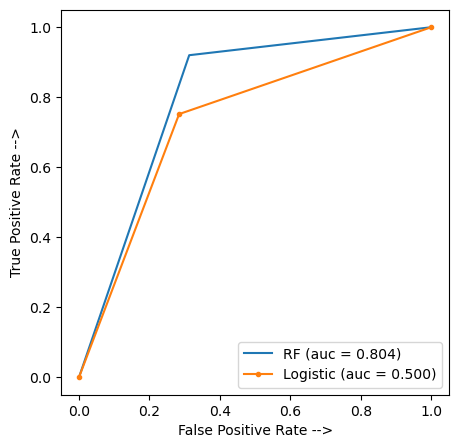

In [127]:
from sklearn.metrics import roc_curve, auc
RF_fpr, RF_tpr, threshold = roc_curve(y_test, prediction_RF)
auc_RF = auc(RF_fpr,RF_tpr)
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, prediction_log)
auc_logistic = auc(logistic_fpr, logistic_fpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RF_fpr, RF_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_RF)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [128]:
print("Length of y_test:", len(y_test))
print("Length of prediction_log:", len(prediction_log))

Length of y_test: 30084
Length of prediction_log: 30084


# Decision Tree

Accuracy: 0.8258875149581173
F1 Score (weighted): 0.8239976102184685
ROC-AUC Score: 0.9095355230561251
Confusion Matrix:
 [[7285 2830]
 [ 662 9279]]


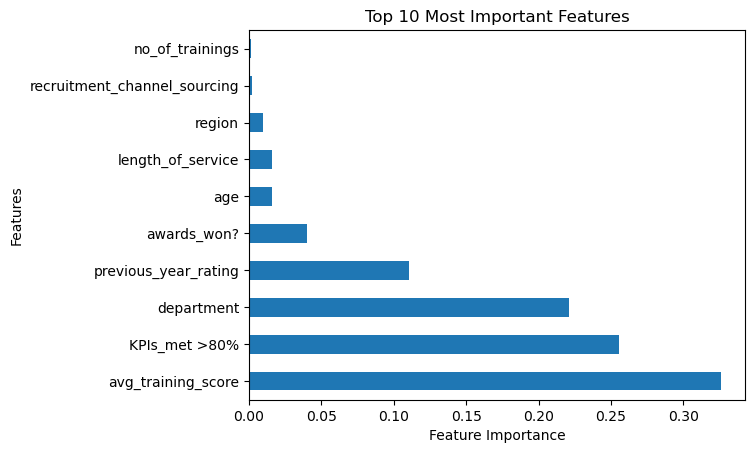


Accuracy values for 10-fold Cross Validation:
 [0.83004749 0.82266752 0.82405225 0.83266409 0.8237504  0.82601827
 0.82217835 0.83138306 0.82879627 0.84455712]

Final Average Accuracy of the model: 0.83


In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded in X and y
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to handle imbalanced classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Creating and training the Decision Tree model with adjusted hyperparameters
dt = DecisionTreeClassifier(max_depth=10, class_weight=dict(enumerate(class_weights)), criterion="gini")
dt.fit(X_train, y_train)

# Making predictions on the test set
yhat = dt.predict(X_test)

# Print accuracy, F1 score, ROC-AUC score, and confusion matrix
print("Accuracy:", accuracy_score(y_test, yhat))
print("F1 Score (weighted):", f1_score(y_test, yhat, average="weighted"))
print("ROC-AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(dt.feature_importances_, index=Predictors)
top_10_features = feature_importances.nlargest(10)
top_10_features.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Importing cross-validation function from sklearn
# Running 10-Fold Cross-validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(dt, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# ADABOOST 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     10115
           1       0.73      0.94      0.82      9941

    accuracy                           0.80     20056
   macro avg       0.82      0.80      0.79     20056
weighted avg       0.82      0.80      0.79     20056

[[6667 3448]
 [ 637 9304]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.79453853 0.78772603 0.79387909 0.79743705 0.78791024 0.7909107
 0.7919356  0.79255057 0.79762833 0.8231793 ]

Final Average Accuracy of the model: 0.8


<Axes: >

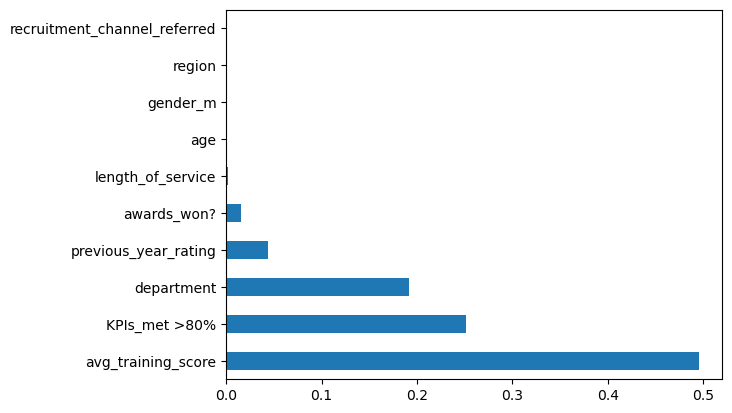

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Sample data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choosing Decision Tree with max_depth=4 as the weak learner
# Choose different values of max_depth, n_estimators, and learning_rate to tune the model
DTC = DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.01, estimator=DTC)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB = clf.fit(X_train, y_train)
prediction_AB = AB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction_AB))
print(metrics.confusion_matrix(y_test, prediction_AB))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction_AB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Importing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross-validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(AB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [131]:
# Xtreme Gradient Boosting (XGBoost)
!pip install xgboost
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction_XGB=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_XGB))
print(metrics.confusion_matrix(y_test, prediction_XGB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_XGB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     10115
           1       0.78      0.96      0.86      9941

    accuracy                           0.84     20056
   macro avg       0.87

C:\Users\Akshara Dileep\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'